DirectLiNGAM is a direct method for learning the basic LiNGAM model. It uses an entropy-based measure to evaluate independence between error variables. The basic LiNGAM model makes the following assumptions.

#### Linearity 
#### Non-Gaussian continuous error variables (except at most one)
#### Acyclicity
#### No hidden common causes


Denote observed variables by xi
 and error variables by ei
 and coefficients or connection strengths bij
. Collect them in vectors x
 and e
 and a matrix B
, respectivelly. Due to the acyclicity assumption, the adjacency matrix B
 can be permuted to be strictly lower-triangular by a simultaneous row and column permutation. The error variables ei
 are independent due to the assumption of no hidden common causes.

Then, mathematically, the model for observed variable vector x
 is written as

x=Bx+e.

To check if the LiNGAM assumption is broken, we can get p-values of independence between error variables. The value in the i-th row and j-th column of the obtained matrix shows the p-value of the independence of the error variables ei
 and ej
.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import graphviz
import lingam
from lingam.utils import make_dot
data=pd.read_csv('a1_data.csv')
data.tail()

,A,B,C,D,E,F,G,H,I,J,K
11667,3.793141,3.921324,3.895300,3.000136,2.883361,2.333931,2.847800,3.898225,2.699285,1.123815,2.824223
11668,3.469416,3.491603,3.629846,2.898924,2.700522,2.953265,3.093751,3.804530,2.699285,1.707091,2.824223
11669,3.550766,3.480149,3.653584,2.859884,2.535938,1.754421,2.606183,3.703122,2.699285,0.963030,3.125252
11670,3.641136,3.679161,3.137581,2.870503,2.706313,2.773593,2.882737,3.749889,4.347643,3.855321,3.211612
11671,3.586360,2.832224,3.242749,3.792578,2.887171,2.085967,2.402463,3.789189,2.699285,0.730129,3.041706


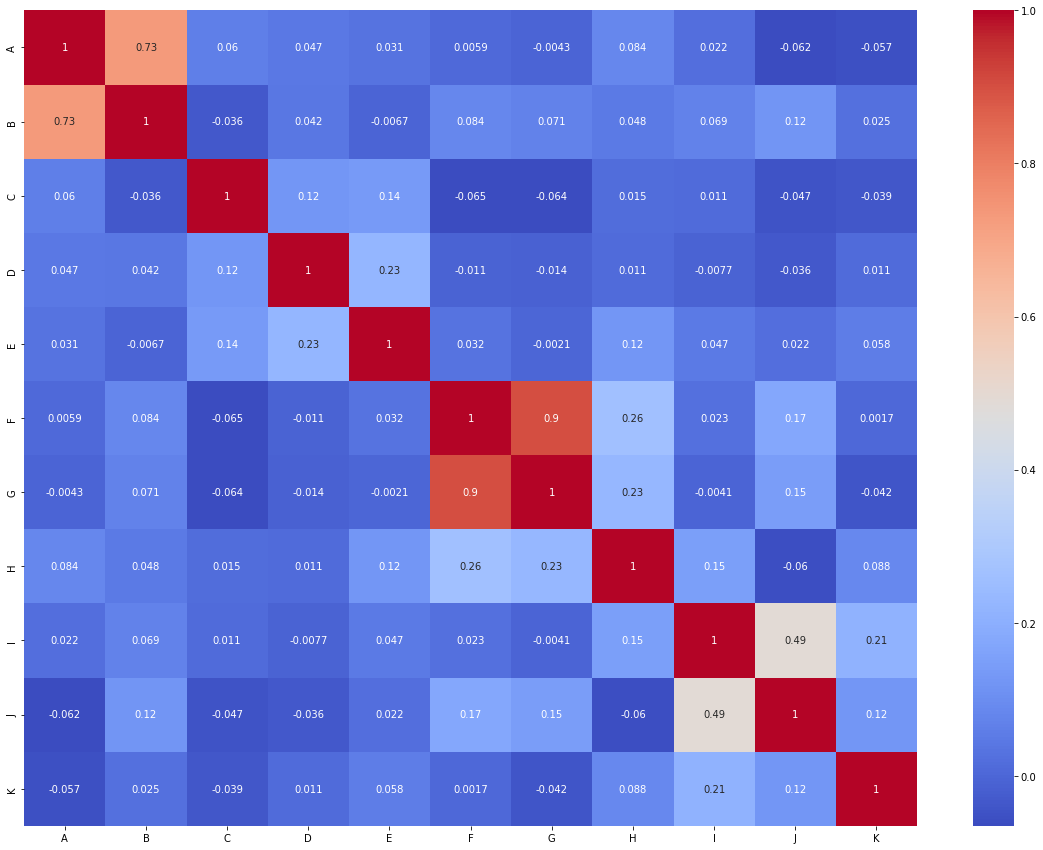

In [2]:
data.corr()
plt.figure(figsize=(20,15))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# change the size of the plot   
plt.show()

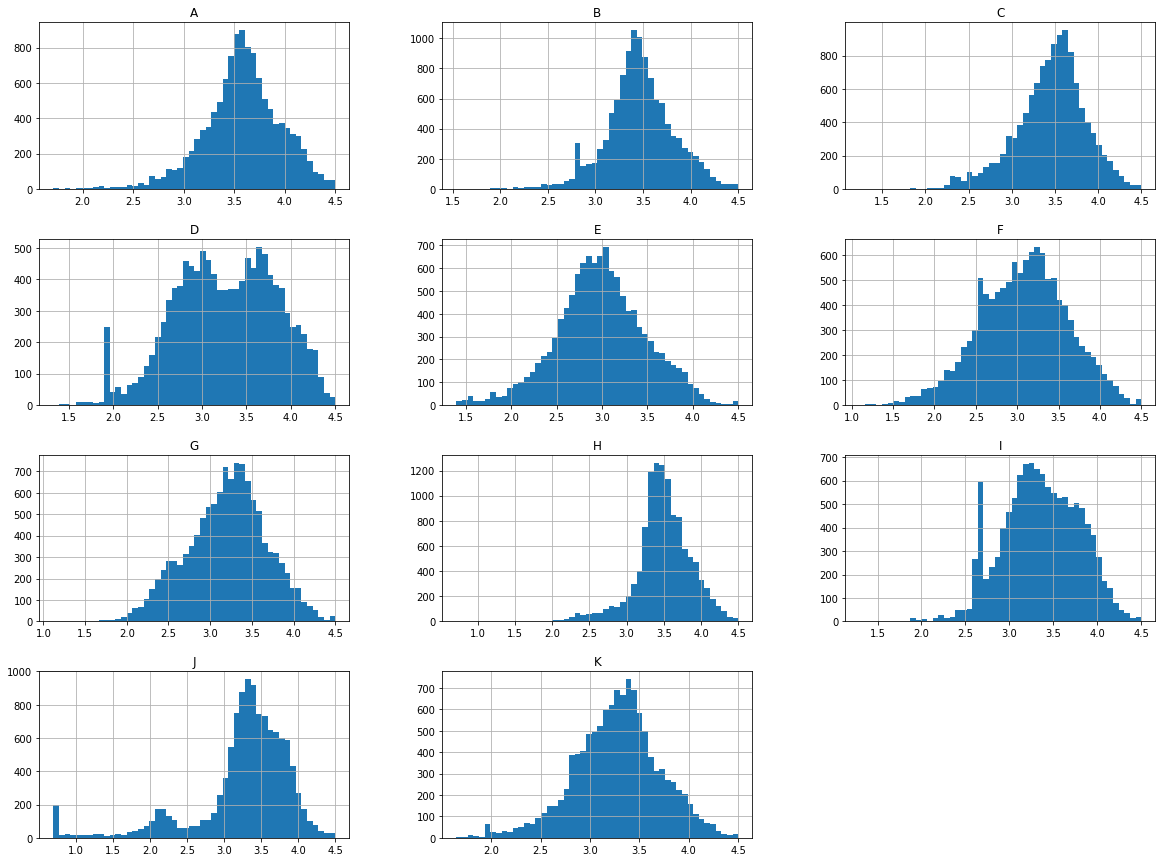

In [3]:
# plot the histogram of the data
data.hist(bins=50, figsize=(20,15))
plt.show()


In [4]:
# Model Creation
model = lingam.DirectLiNGAM()
model.fit(data)

/home/jay/miniconda3/envs/jay/lib/python3.10/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/home/jay/miniconda3/envs/jay/lib/python3.10/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline 

In [5]:
model.causal_order_

[8, 10, 7, 9, 4, 3, 2, 6, 5, 1, 0]

In [6]:
model.adjacency_matrix_

array([[ 0.        ,  0.80159201,  0.06325068,  0.        ,  0.01784886,
         0.        , -0.03041948,  0.03750521,  0.04244209, -0.089117  ,
        -0.05804815],
       [ 0.        ,  0.        , -0.02169969,  0.02781184, -0.01063404,
         0.03170977,  0.        ,  0.03351882,  0.00304052,  0.05764612,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.06191873,  0.0901885 ,
         0.        ,  0.        ,  0.        ,  0.0334701 , -0.03232258,
        -0.03881611],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.26326978,
         0.        ,  0.        , -0.022512  ,  0.        , -0.03300549,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.15485446,  0.01278223,  0.0135379 ,
         0.04778094],
       [ 0.        ,  0.        , -0.01023843,  0.        ,  0.02532086,
         0.        ,  0.9844476 ,  0.0781015 , -0.00821596,  0.03498288,
         0.031

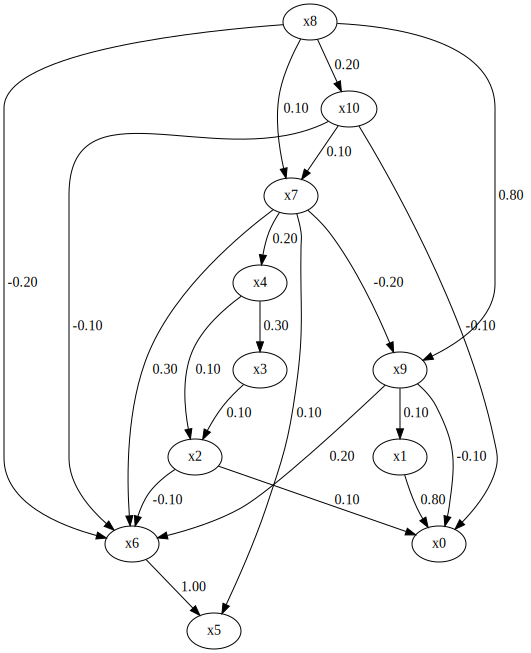

In [14]:
make_dot(model.adjacency_matrix_.round(1))

In [23]:
pd.DataFrame(data=model.adjacency_matrix_.round(1),columns=data.columns,index=data.columns)

,A,B,C,D,E,F,G,H,I,J,K
A,0.0,0.8,0.1,0.0,0.0,0.0,-0.0,0.0,0.0,-0.1,-0.1
B,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.1,0.0
C,0.0,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.0,-0.0,-0.0
D,0.0,0.0,0.0,0.0,0.3,0.0,0.0,-0.0,0.0,-0.0,0.0
E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0
F,0.0,0.0,-0.0,0.0,0.0,0.0,1.0,0.1,-0.0,0.0,0.0
G,0.0,0.0,-0.1,0.0,-0.0,0.0,0.0,0.3,-0.2,0.2,-0.1
H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.1
I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.2,0.8,0.0,0.0


In [11]:
# make_dot(model.adjacency_matrix_)

### Assumption Check

In [8]:
p_values = model.get_error_independence_p_values(data)
print(p_values)

KeyboardInterrupt: 

In [10]:
dir(model)

['_Aknw',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_adjacency_matrix',
 '_apply_prior_knowledge_softly',
 '_causal_order',
 '_diff_mutual_info',
 '_entropy',
 '_estimate_adjacency_matrix',
 '_extract_partial_orders',
 '_measure',
 '_mutual_information',
 '_random_state',
 '_residual',
 '_search_candidate',
 '_search_causal_order',
 '_search_causal_order_kernel',
 'adjacency_matrix_',
 'bootstrap',
 'causal_order_',
 'estimate_total_effect',
 'fit',
 'get_error_independence_p_values']